<a href="https://colab.research.google.com/github/rmDL4SON/Git_Practice/blob/main/ROC_Curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np

In [44]:
X, Y = make_classification(n_samples=5000, n_classes=2, n_features=10, random_state=0)

In [45]:
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]


In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

Build Classification Model

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

Random Forest

In [48]:
rf = RandomForestClassifier(max_features=5, n_estimators=500)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_features=5, n_estimators=500)

Naive Bayes

In [49]:
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

Prediction Probabbilities

In [50]:
r_probs = [0 for _ in range(len(Y_test))]
rf_probs = rf.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)

In [51]:
rf_probs = rf_probs[:,1]
nb_probs = nb_probs[:,1]

In [52]:
from sklearn.metrics import roc_curve, roc_auc_score

In [53]:
r_auc = roc_auc_score(Y_test, r_probs)
rf_auc = roc_auc_score(Y_test, rf_probs)
nb_auc = roc_auc_score(Y_test, nb_probs)

In [54]:
print(f'Random prediction: {r_auc}')
print(f'Random Forest prediction: {rf_auc}')
print(f'Naive Bayes prediction: {nb_auc}')

Random prediction: 0.5
Random Forest prediction: 0.9216016864067456
Naive Bayes prediction: 0.9856919427677711


In [55]:
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(Y_test, nb_probs)


In [56]:
import matplotlib.pyplot as plt

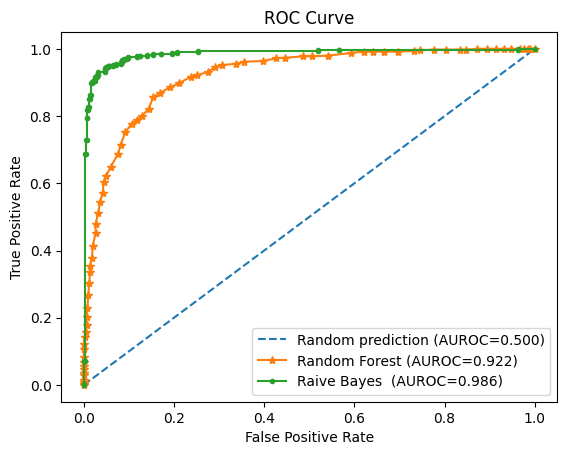

In [57]:
plt.plot(r_fpr,r_tpr, linestyle='--', label='Random prediction (AUROC=%0.3f)'  %r_auc)
plt.plot(rf_fpr,rf_tpr, marker='*', label='Random Forest (AUROC=%0.3f)'  %rf_auc)
plt.plot(nb_fpr,nb_tpr, marker='.', label='Raive Bayes  (AUROC=%0.3f)'  %nb_auc)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()